In [1]:
from google.colab import drive
drive.mount('/drive', force_remount = True)

Mounted at /drive


In [48]:
import seaborn as sns
import pandas as pd
import numpy as np
!pip install pingouin
import pingouin as pg
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# load dataset
df = pd.read_csv('/drive/MyDrive/INF2178_A4_data.csv')

In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    int64  
 1   Subject ID  294 non-null    object 
 2   MRI ID      294 non-null    object 
 3   Group       294 non-null    object 
 4   Visit       294 non-null    int64  
 5   MR Delay    294 non-null    int64  
 6   M/F         294 non-null    object 
 7   Hand        294 non-null    object 
 8   Age         294 non-null    int64  
 9   EDUC        294 non-null    int64  
 10  SES         279 non-null    float64
 11  MMSE        293 non-null    float64
 12  CDR         294 non-null    float64
 13  eTIV        294 non-null    int64  
 14  nWBV        294 non-null    float64
 15  ASF         294 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 36.9+ KB


,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


<Figure size 800x600 with 0 Axes>

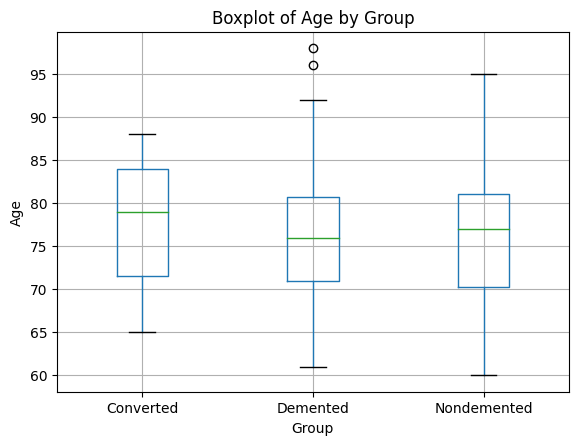

In [15]:
# show plot based on group
plt.figure(figsize=(8, 6))
df.boxplot(column='Age', by='Group')
plt.title('Boxplot of Age by Group')
plt.xlabel('Group')
plt.ylabel('Age')
plt.suptitle('')
plt.show()

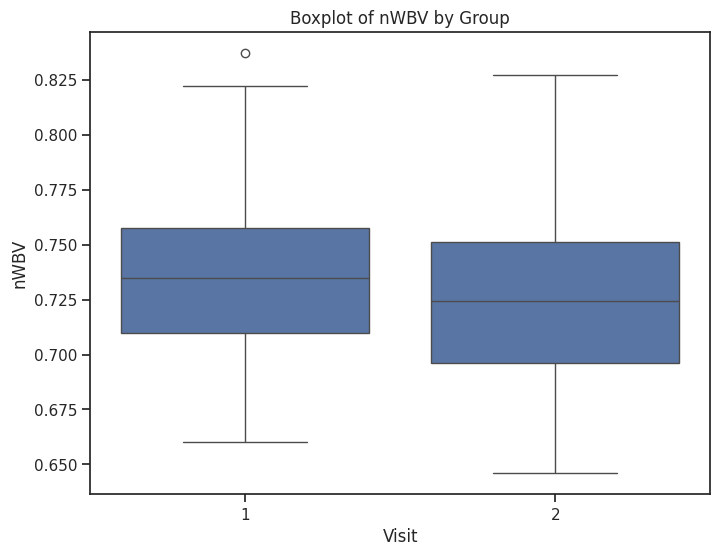

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Visit', y='nWBV', data=df)

# Set labels
plt.xlabel('Visit')
plt.ylabel('nWBV')
plt.title('Boxplot of nWBV by Group')

# Show plot
plt.show()

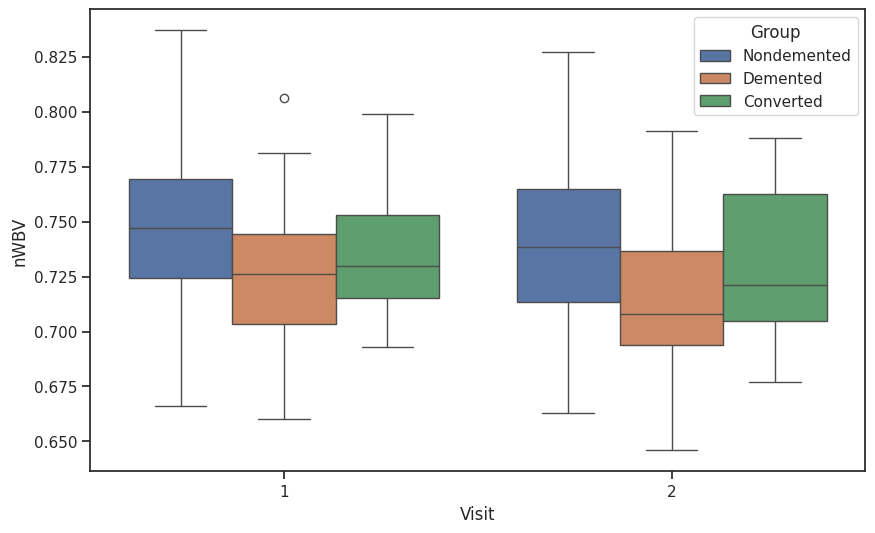

In [43]:
sns.set(style="ticks")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Visit', y='nWBV', hue='Group', data=df)

# Set labels
plt.xlabel('Visit')
plt.ylabel('nWBV')

# Show plot
plt.show()

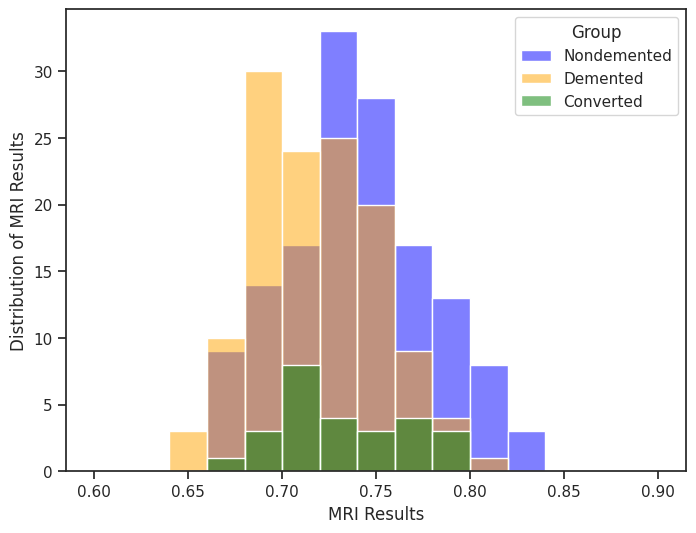

In [27]:
nondemented_mri = df[df['Group'] == 'Nondemented']['nWBV'].values
demented_mri = df[df['Group'] == 'Demented']['nWBV'].values
converted_mri = df[df['Group'] == 'Converted']['nWBV'].values

# Set the style
sns.set(style="ticks")

# Define bins
bins = np.arange(0.6, 0.9, 0.02)  # Adjust the bin size according to your data

# Create subplots for distribution plots
fig, ax = plt.subplots(figsize=(8, 6))

# Plot distribution for each group
sns.histplot(nondemented_mri, bins=bins, label='Nondemented', color='blue', alpha=0.5, ax=ax)
sns.histplot(demented_mri, bins=bins, label='Demented', color='orange', alpha=0.5, ax=ax)
sns.histplot(converted_mri, bins=bins, label='Converted', color='green', alpha=0.5, ax=ax)

# Set labels and legend
plt.xlabel('MRI Results')
plt.ylabel('Distribution of MRI Results')
plt.legend(title='Group')


# Show plot
plt.show()

In [36]:
# Calculate means for each group
mu1 = df[df['Group'] == 'Nondemented']['nWBV'].mean()
mu2 = df[df['Group'] == 'Demented']['nWBV'].mean()
mu3 = df[df['Group'] == 'Converted']['nWBV'].mean()

# Print means with specific format
print("mu1 = {:.3f}".format(mu1))
print("mu2 = {:.3f}".format(mu2))
print("mu3 = {:.3f}".format(mu3))

# Grand mean
mu = df['nWBV'].mean()
print("mu = {:.3f}".format(mu))

# Number of samples for each group
n1 = len(df[df['Group'] == 'Nondemented'])
n2 = len(df[df['Group'] == 'Demented'])
n3 = len(df[df['Group'] == 'Converted'])

# Number of total samples
n = n1 + n2 + n3

# SS groups
SSgroups = n1 * (mu1 - mu) ** 2 + n2 * (mu2 - mu) ** 2 + n3 * (mu3 - mu) ** 2
print("SS groups = {:.3f}".format(SSgroups))


mu1 = 0.742
mu2 = 0.719
mu3 = 0.733
mu = 0.731
SS groups = 0.035


<ipython-input-44-51891e5da428>:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df, x='Visit', y='nWBV', hue='Group', dodge=True,


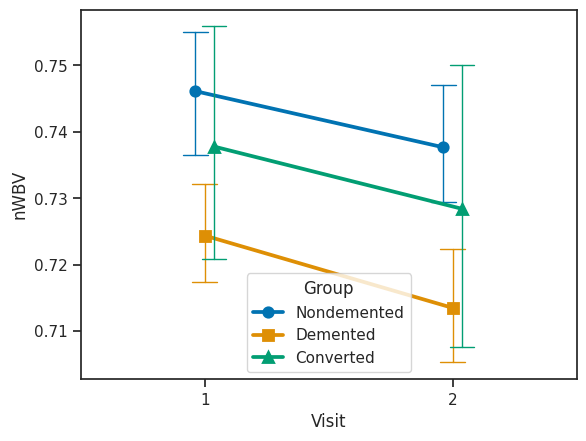

In [44]:
# do the mixed anova
sns.pointplot(data=df, x='Visit', y='nWBV', hue='Group', dodge=True,
              markers=['o', 's', '^'],
              capsize=.1, errwidth=1, palette='colorblind')
plt.show()


In [45]:
df.groupby(['Visit', 'Group'])['nWBV'].agg(['mean', 'std']).round(2)

mean   std
Visit Group                  
1     Converted    0.74  0.03
      Demented     0.72  0.03
      Nondemented  0.75  0.04
2     Converted    0.73  0.04
      Demented     0.71  0.03
      Nondemented  0.74  0.04

In [51]:
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='nWBV', within='Visit', between='Group', subject='Subject ID', data=df)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
Group        0.034      2    141  0.017   6.712    0.002  0.087  nan
Visit        0.007      1    141  0.007  94.251    0.000  0.401    1.000
Interaction  0.000      2    141  0.000   1.534    0.219  0.021  nan



In [52]:
# Posthoc test
posthocs = pg.pairwise_ttests(dv='nWBV', within='Visit', between='Group',
                              subject='Subject ID', data=df)
pg.print_table(posthocs)

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)



POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc                 BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  -------------------  --------
Visit          -        1          2            True      True           9.672  143.000  two-sided        0.000  225800000000000.000     0.255
Group          -        Converted  Demented     False     True           1.401   14.676  two-sided        0.182                0.668     0.469
Group          -        Converted  Nondemented  False     True          -0.648   15.832  two-sided        0.527                0.361    -0.188
Group          -        Demented   Nondemented  False     True          -3.690  129.436  two-sided        0.000               75.094    -0.633
Visit * Group  1        Converted  Demented     False     True           1.444   14.626  two-sided        0.170              

In [61]:
import scipy.stats
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt

power_analysis = smp.TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=0.5, power=0.8, alpha=0.05)
sample_size

63.765611775409525

In [63]:

#simulating:
#+
num_runs = 5000
effectSize = 0.8

# perform power analysis to get sample size
power_analysis = smp.TTestIndPower()
sampleSize = power_analysis.solve_power(
    effect_size=effectSize, power=0.8, alpha=0.05)

# round up from estimated sample size
sampleSize = np.int64(np.ceil(sampleSize))

# create a function that will generate samples and test for
# a difference between groups using a two-sample t-test


def get_t_result(sampleSize, effectSize):
    """
    perform a ttest on random data of n=sampSize
    """

    group1 = np.random.normal(loc=0.0, scale=1.0, size=sampleSize)
    group2 = np.random.normal(loc=effectSize, scale=1.0, size=sampleSize)
    ttresult = scipy.stats.ttest_ind(group1, group2)
    return(ttresult.pvalue)


# create input data frame for output
power_sim_results = pd.DataFrame({'p_value': np.zeros(num_runs)})

for run in range(num_runs):
    power_sim_results.loc[run, 'p_value'] = get_t_result(sampleSize, effectSize)


p_reject = np.mean(power_sim_results['p_value'] < 0.05)
p_reject
#-

0.7974

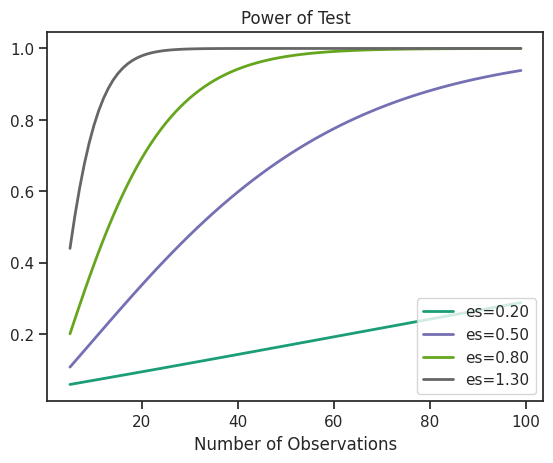

In [64]:
#power curves
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower


# power analysis varying parameters
effect_sizes = np.array([0.2, 0.5, 0.8,1.3])
sample_sizes = np.array(range(5, 100))

# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
			effect_size=effect_sizes)

plt.show()